# 1. Business Understanding

Insurance companies hold a lot of data, including very sensitive data such as the name, date of birth and exact residential address and account details of their policyholders. More and more, insurance companies are now processing and evaluating this data automatically and using it for further insurance processes. Of course, this still involves calculating the current risk for existing insurance products and, based on this, calculating the premium and the possible amount of the claim. Creating new insurance products based on demand, which can be concluded at short notice and have a very short term, is another trend that can be supported by data. The central questions here are, of course: What data is relevant for detecting insurance fraud? How must this data be structured? Which model is best suited to predict insurance fraud in a claim? What criteria should be used to compare different ML models? How reliable does insurance fraud prediction work?

# 2. Data Understanding

The data set used consists of 1000 sentences and has 40 different so-called features, i.e. collected data categories. This means that the data basis is not that large, but the possibilities to examine different features are all the greater. It shows information on policyholders, policy data on policyholders and their motor vehicles, as well as accidents and the amount of claims. Since there are so many features in the dataset, they and their descriptions are explained in the table below. The target variable shows whether insurance fraud is present ("fraud_reported"). The dataset is a good example of classification models because of the binary target variable (also referred to as target later).

## 2.1 Import of relevant Modules

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

sns.set()

%matplotlib inline

## 2.2 Read Data

In [2]:
raw_data = pd.read_csv('https://storage.googleapis.com/ml-service-repository-datastorage/Insurance_Fraud_detection_dataset.csv')

## 2.3 Descriptive Analytics

In [3]:
raw_data.shape

(1000, 40)

--> 1000 samples and 40 columns

In [4]:
raw_data.head()

,months_as_customer,age,policy_number,policy_bind_date,policy_state,policy_csl,policy_deductable,policy_annual_premium,umbrella_limit,insured_zip,...,police_report_available,total_claim_amount,injury_claim,property_claim,vehicle_claim,auto_make,auto_model,auto_year,fraud_reported,_c39
0,328,48,521585,2014-10-17,OH,250/500,1000,1406.91,0,466132,...,YES,71610,6510,13020,52080,Saab,92x,2004,Y,NaN
1,228,42,342868,2006-06-27,IN,250/500,2000,1197.22,5000000,468176,...,?,5070,780,780,3510,Mercedes,E400,2007,Y,NaN
2,134,29,687698,2000-09-06,OH,100/300,2000,1413.14,5000000,430632,...,NO,34650,7700,3850,23100,Dodge,RAM,2007,N,NaN
3,256,41,227811,1990-05-25,IL,250/500,2000,1415.74,6000000,608117,...,NO,63400,6340,6340,50720,Chevrolet,Tahoe,2014,Y,NaN
4,228,44,367455,2014-06-06,IL,500/1000,1000,1583.91,6000000,610706,...,NO,6500,1300,650,4550,Accura,RSX,2009,N,NaN


In [5]:
raw_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 40 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   months_as_customer           1000 non-null   int64  
 1   age                          1000 non-null   int64  
 2   policy_number                1000 non-null   int64  
 3   policy_bind_date             1000 non-null   object 
 4   policy_state                 1000 non-null   object 
 5   policy_csl                   1000 non-null   object 
 6   policy_deductable            1000 non-null   int64  
 7   policy_annual_premium        1000 non-null   float64
 8   umbrella_limit               1000 non-null   int64  
 9   insured_zip                  1000 non-null   int64  
 10  insured_sex                  1000 non-null   object 
 11  insured_education_level      1000 non-null   object 
 12  insured_occupation           1000 non-null   object 
 13  insured_hobbies    

# 3. Data Preparation

## 3.1 Data cleaning

In [6]:
# replace "?" with "NaN" in the dataset
raw_data.replace('?', np.nan, inplace=True)

In [7]:
# checking missing values
raw_data.isnull().sum()

months_as_customer                0
age                               0
policy_number                     0
policy_bind_date                  0
policy_state                      0
policy_csl                        0
policy_deductable                 0
policy_annual_premium             0
umbrella_limit                    0
insured_zip                       0
insured_sex                       0
insured_education_level           0
insured_occupation                0
insured_hobbies                   0
insured_relationship              0
capital-gains                     0
capital-loss                      0
incident_date                     0
incident_type                     0
collision_type                  178
incident_severity                 0
authorities_contacted             0
incident_state                    0
incident_city                     0
incident_location                 0
incident_hour_of_the_day          0
number_of_vehicles_involved       0
property_damage             

In [8]:
# delete column _c39, no relevant feature
data_no_mv = raw_data.drop('_c39', axis=1)
data_no_mv.shape

(1000, 39)

In [9]:
# since there are relatively few records anyway, the zero values are replaced by the mean value of the respective column
print(data_no_mv['collision_type'].mode()[0])
print(data_no_mv['property_damage'].mode()[0])
print(data_no_mv['police_report_available'].mode()[0])

Rear Collision
NO
NO


In [10]:
data_no_mv['collision_type'] = data_no_mv['collision_type'].fillna(data_no_mv['collision_type'].mode()[0])
data_no_mv['property_damage'] = data_no_mv['property_damage'].fillna(data_no_mv['property_damage'].mode()[0])
data_no_mv['police_report_available'] = data_no_mv['police_report_available'].fillna(data_no_mv['police_report_available'].mode()[0])

In [11]:
# checking missing values
data_no_mv.isnull().sum()

months_as_customer             0
age                            0
policy_number                  0
policy_bind_date               0
policy_state                   0
policy_csl                     0
policy_deductable              0
policy_annual_premium          0
umbrella_limit                 0
insured_zip                    0
insured_sex                    0
insured_education_level        0
insured_occupation             0
insured_hobbies                0
insured_relationship           0
capital-gains                  0
capital-loss                   0
incident_date                  0
incident_type                  0
collision_type                 0
incident_severity              0
authorities_contacted          0
incident_state                 0
incident_city                  0
incident_location              0
incident_hour_of_the_day       0
number_of_vehicles_involved    0
property_damage                0
bodily_injuries                0
witnesses                      0
police_rep

In [12]:
# checking duplicates
data_no_dup = data_no_mv.copy()
data_no_dup['policy_number'] = data_no_dup['policy_number'].duplicated(keep=False)

In [13]:
data_no_dup.shape

(1000, 39)

In [14]:
data_no_dup.describe(include='all')

,months_as_customer,age,policy_number,policy_bind_date,policy_state,policy_csl,policy_deductable,policy_annual_premium,umbrella_limit,insured_zip,...,witnesses,police_report_available,total_claim_amount,injury_claim,property_claim,vehicle_claim,auto_make,auto_model,auto_year,fraud_reported
count,1000.000000,1000.000000,1000,1000,1000,1000,1000.000000,1000.000000,1.000000e+03,1000.000000,...,1000.000000,1000,1000.00000,1000.000000,1000.000000,1000.000000,1000,1000,1000.000000,1000
unique,NaN,NaN,1,951,3,3,NaN,NaN,NaN,NaN,...,NaN,2,NaN,NaN,NaN,NaN,14,39,NaN,2
top,NaN,NaN,False,2006-01-01,OH,250/500,NaN,NaN,NaN,NaN,...,NaN,NO,NaN,NaN,NaN,NaN,Dodge,RAM,NaN,N
freq,NaN,NaN,1000,3,352,351,NaN,NaN,NaN,NaN,...,NaN,686,NaN,NaN,NaN,NaN,80,43,NaN,753
mean,203.954000,38.948000,NaN,NaN,NaN,NaN,1136.000000,1256.406150,1.101000e+06,501214.488000,...,1.487000,NaN,52761.94000,7433.420000,7399.570000,37928.950000,NaN,NaN,2005.103000,NaN
std,115.113174,9.140287,NaN,NaN,NaN,NaN,611.864673,244.167395,2.297407e+06,71701.610941,...,1.111335,NaN,26401.53319,4880.951853,4824.726179,18886.252893,NaN,NaN,6.015861,NaN
min,0.000000,19.000000,NaN,NaN,NaN,NaN,500.000000,433.330000,-1.000000e+06,430104.000000,...,0.000000,NaN,100.00000,0.000000,0.000000,70.000000,NaN,NaN,1995.000000,NaN
25%,115.750000,32.000000,NaN,NaN,NaN,NaN,500.000000,1089.607500,0.000000e+00,448404.500000,...,1.000000,NaN,41812.50000,4295.000000,4445.000000,30292.500000,NaN,NaN,2000.000000,NaN
50%,199.500000,38.000000,NaN,NaN,NaN,NaN,1000.000000,1257.200000,0.000000e+00,466445.500000,...,1.000000,NaN,58055.00000,6775.000000,6750.000000,42100.000000,NaN,NaN,2005.000000,NaN
75%,276.250000,44.000000,NaN,NaN,NaN,NaN,2000.000000,1415.695000,0.000000e+00,603251.000000,...,2.000000,NaN,70592.50000,11305.000000,10885.000000,50822.500000,NaN,NaN,2010.000000,NaN


In [15]:
# map the target from "no" and "yes" to 0 and 1
data_no_dup.fraud_reported = data_no_dup.fraud_reported.map({'N': 0, 'Y': 1})

In [16]:
data_no_dup.head()

,months_as_customer,age,policy_number,policy_bind_date,policy_state,policy_csl,policy_deductable,policy_annual_premium,umbrella_limit,insured_zip,...,witnesses,police_report_available,total_claim_amount,injury_claim,property_claim,vehicle_claim,auto_make,auto_model,auto_year,fraud_reported
0,328,48,False,2014-10-17,OH,250/500,1000,1406.91,0,466132,...,2,YES,71610,6510,13020,52080,Saab,92x,2004,1
1,228,42,False,2006-06-27,IN,250/500,2000,1197.22,5000000,468176,...,0,NO,5070,780,780,3510,Mercedes,E400,2007,1
2,134,29,False,2000-09-06,OH,100/300,2000,1413.14,5000000,430632,...,3,NO,34650,7700,3850,23100,Dodge,RAM,2007,0
3,256,41,False,1990-05-25,IL,250/500,2000,1415.74,6000000,608117,...,2,NO,63400,6340,6340,50720,Chevrolet,Tahoe,2014,1
4,228,44,False,2014-06-06,IL,500/1000,1000,1583.91,6000000,610706,...,1,NO,6500,1300,650,4550,Accura,RSX,2009,0


## 3.2 Test for Correlation

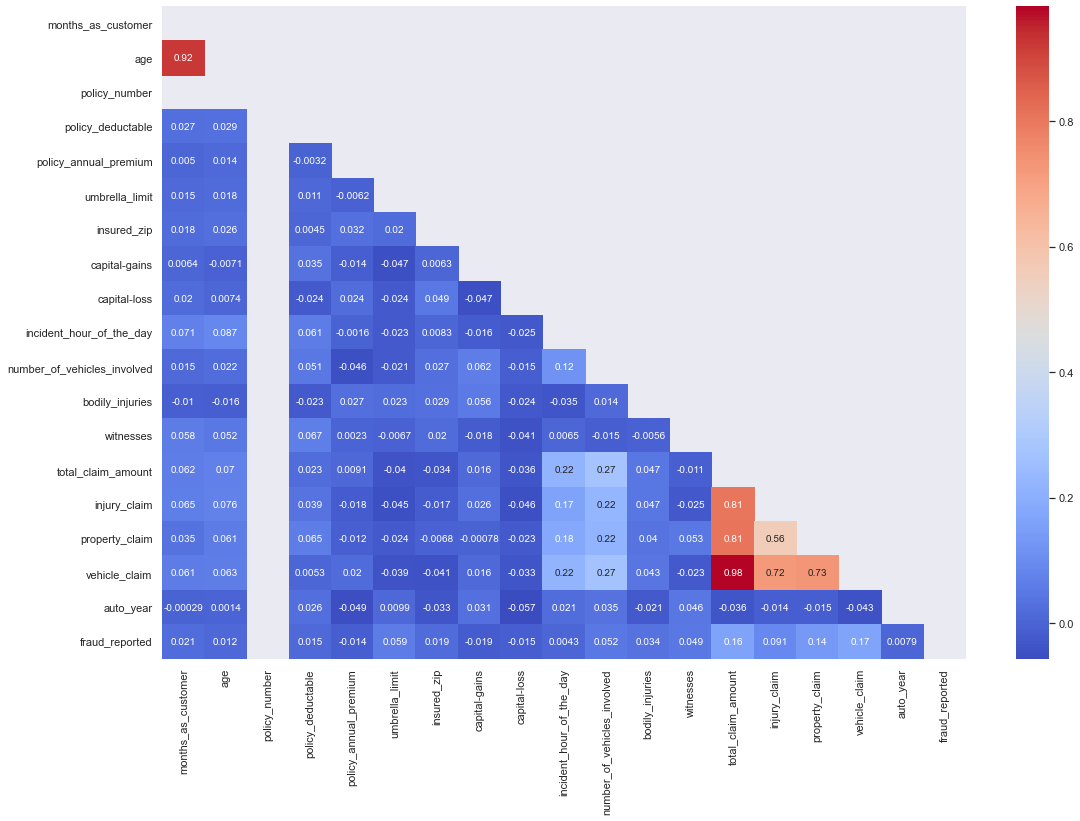

In [17]:
# checking correlation
plt.figure(figsize=(18, 12))

feature_corr = data_no_dup.corr()
mask = np.triu(np.ones_like(feature_corr, dtype = bool))
sns.heatmap(feature_corr, mask=mask, annot=True, cmap='coolwarm')

plt.show()

--> high correalion between *age* and *months_as_customer*, also between *total_claim_amount* and *injury_claim, property_claim and vehicle_claim*. 

In [18]:
# drop features because of the correlation 
cols_to_drop = ['age', 'total_claim_amount', 'policy_number', 'policy_bind_date', 'policy_state', 
                'incident_state', 'incident_city', 'incident_location', 'incident_hour_of_the_day', 
                'insured_zip'] 
data01 = data_no_dup.drop(cols_to_drop, axis=1)
data01.shape

(1000, 29)

In [19]:
# seperate numeric and categorical feature
data_cat = data01.select_dtypes(include='object')
data_num = data01.select_dtypes(exclude='object')

In [20]:
data_cat.head()

,policy_csl,insured_sex,insured_education_level,insured_occupation,insured_hobbies,insured_relationship,incident_date,incident_type,collision_type,incident_severity,authorities_contacted,property_damage,police_report_available,auto_make,auto_model
0,250/500,MALE,MD,craft-repair,sleeping,husband,2015-01-25,Single Vehicle Collision,Side Collision,Major Damage,Police,YES,YES,Saab,92x
1,250/500,MALE,MD,machine-op-inspct,reading,other-relative,2015-01-21,Vehicle Theft,Rear Collision,Minor Damage,Police,NO,NO,Mercedes,E400
2,100/300,FEMALE,PhD,sales,board-games,own-child,2015-02-22,Multi-vehicle Collision,Rear Collision,Minor Damage,Police,NO,NO,Dodge,RAM
3,250/500,FEMALE,PhD,armed-forces,board-games,unmarried,2015-01-10,Single Vehicle Collision,Front Collision,Major Damage,Police,NO,NO,Chevrolet,Tahoe
4,500/1000,MALE,Associate,sales,board-games,unmarried,2015-02-17,Vehicle Theft,Rear Collision,Minor Damage,None,NO,NO,Accura,RSX


## 3.2 Checking features in relation to target

In [21]:
data_cat = pd.concat([data_cat, data_num.fraud_reported], axis=1)
data_cat.head()

,policy_csl,insured_sex,insured_education_level,insured_occupation,insured_hobbies,insured_relationship,incident_date,incident_type,collision_type,incident_severity,authorities_contacted,property_damage,police_report_available,auto_make,auto_model,fraud_reported
0,250/500,MALE,MD,craft-repair,sleeping,husband,2015-01-25,Single Vehicle Collision,Side Collision,Major Damage,Police,YES,YES,Saab,92x,1
1,250/500,MALE,MD,machine-op-inspct,reading,other-relative,2015-01-21,Vehicle Theft,Rear Collision,Minor Damage,Police,NO,NO,Mercedes,E400,1
2,100/300,FEMALE,PhD,sales,board-games,own-child,2015-02-22,Multi-vehicle Collision,Rear Collision,Minor Damage,Police,NO,NO,Dodge,RAM,0
3,250/500,FEMALE,PhD,armed-forces,board-games,unmarried,2015-01-10,Single Vehicle Collision,Front Collision,Major Damage,Police,NO,NO,Chevrolet,Tahoe,1
4,500/1000,MALE,Associate,sales,board-games,unmarried,2015-02-17,Vehicle Theft,Rear Collision,Minor Damage,None,NO,NO,Accura,RSX,0


In [22]:
data_cat.incident_date.loc[data_cat.fraud_reported == 1]

0      2015-01-25
1      2015-01-21
3      2015-01-10
5      2015-01-02
14     2015-01-15
          ...    
974    2015-02-08
977    2015-02-21
982    2015-01-01
986    2015-02-19
987    2015-01-13
Name: incident_date, Length: 247, dtype: object

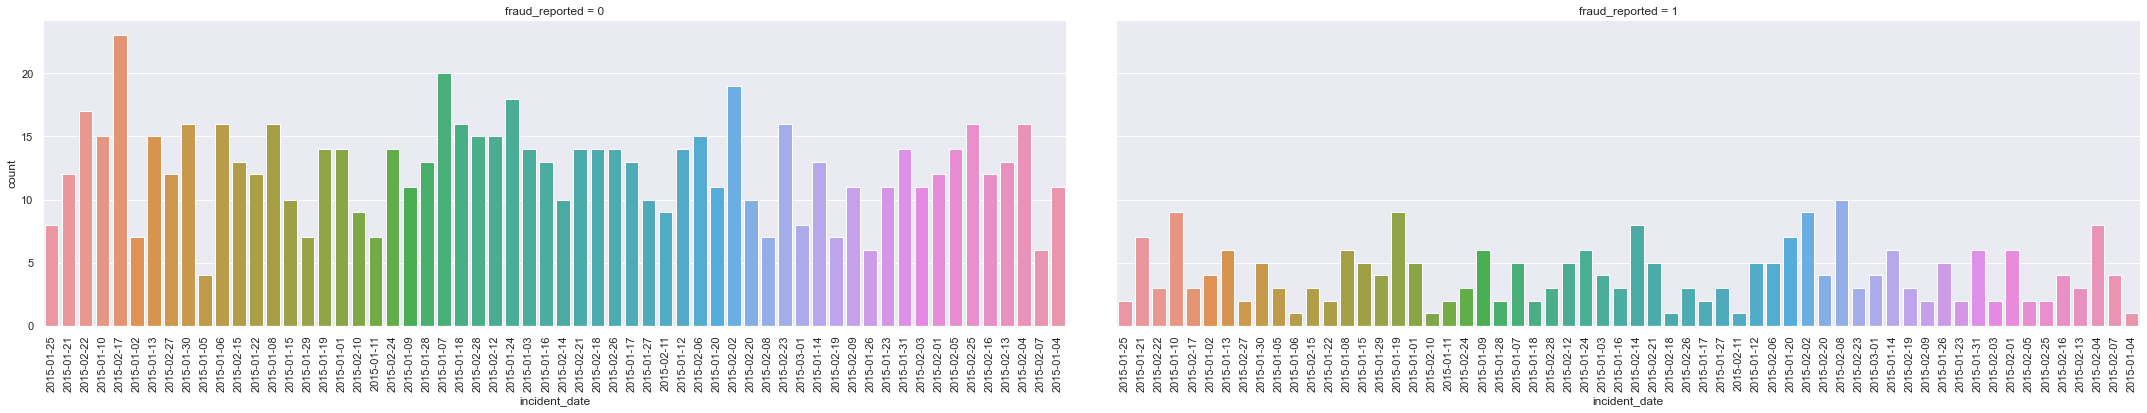

In [23]:
# data_cat.incident_date.values
chart = sns.catplot(x="incident_date", col="fraud_reported", data=data_cat, kind="count", aspect=3)
chart.set_xticklabels(rotation=90)
# plt.savefig('./Daten/VglIncidentVSFraud')
plt.show()

<Figure size 1728x1728 with 0 Axes>

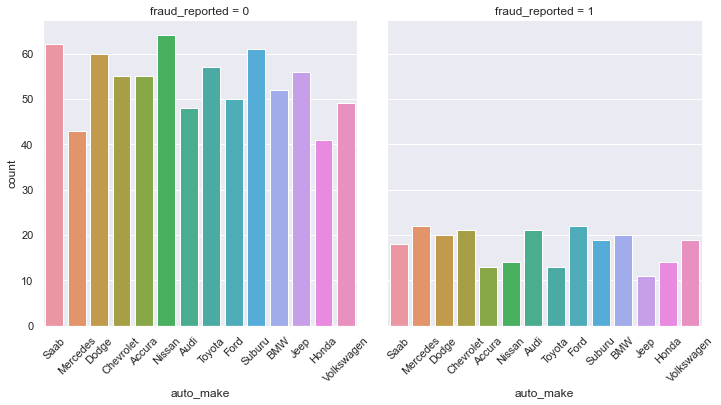

In [24]:
plt.figure(figsize=(24, 24))
chart = sns.catplot(x="auto_make", col="fraud_reported", data=data_cat, kind="count")
chart.set_xticklabels(rotation=45)
# plt.savefig('./Daten/VglIncidentVSFraud')
plt.show()

<Figure size 2304x2304 with 0 Axes>

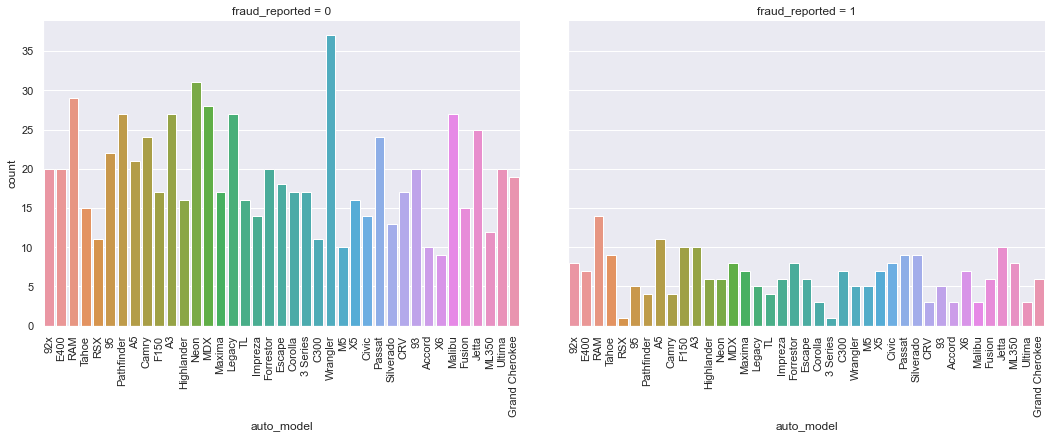

In [25]:
plt.figure(figsize=(32, 32))
chart = sns.catplot(x="auto_model", col="fraud_reported", data=data_cat, kind="count", aspect=1.5)
chart.set_xticklabels(rotation=90)
# plt.savefig('./Daten/VglIncidentVSFraud')
plt.show()

<Figure size 2304x2304 with 0 Axes>

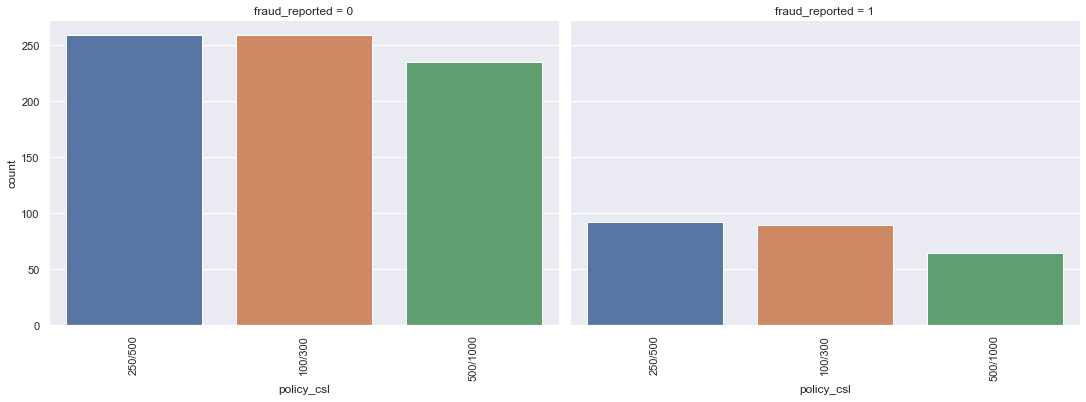

In [26]:
plt.figure(figsize=(32, 32))
chart = sns.catplot(x="policy_csl", col="fraud_reported", data=data_cat, kind="count", aspect=1.5)
chart.set_xticklabels(rotation=90)
# plt.savefig('./Daten/VglIncidentVSFraud')
plt.show()

In [27]:
data_cat[['policy_csl', 'fraud_reported']].groupby(['policy_csl'], as_index=False).mean().sort_values(by='fraud_reported', ascending=False)


,policy_csl,fraud_reported
1,250/500,0.262108
0,100/300,0.257880
2,500/1000,0.216667


In [28]:
data_cat[['insured_hobbies', 'fraud_reported']].groupby(['insured_hobbies'], as_index=False).mean().sort_values(by='fraud_reported', ascending=False)


,insured_hobbies,fraud_reported
5,chess,0.826087
6,cross-fit,0.742857
19,yachting,0.301887
2,board-games,0.291667
14,polo,0.276596
15,reading,0.265625
0,base-jumping,0.265306
10,hiking,0.230769
13,paintball,0.228070
16,skydiving,0.224490


In [29]:
data_cat[['insured_occupation', 'fraud_reported']].groupby(['insured_occupation'], as_index=False).mean().sort_values(by='fraud_reported', ascending=False)


,insured_occupation,fraud_reported
3,exec-managerial,0.368421
4,farming-fishing,0.301887
2,craft-repair,0.297297
13,transport-moving,0.291667
12,tech-support,0.282051
11,sales,0.276316
1,armed-forces,0.246377
6,machine-op-inspct,0.236559
10,protective-serv,0.222222
9,prof-specialty,0.211765


In [30]:
data_cat[['insured_education_level', 'fraud_reported']].groupby(['insured_education_level'], as_index=False).mean().sort_values(by='fraud_reported', ascending=False)


,insured_education_level,fraud_reported
6,PhD,0.264000
4,MD,0.263889
1,College,0.262295
3,JD,0.260870
0,Associate,0.234483
2,High School,0.225000
5,Masters,0.223776


In [31]:
# drop not relevant features
data_cat.drop(['incident_date', 'auto_make', 'auto_model'], axis=1, inplace=True)

In [32]:
data_cat.head()

,policy_csl,insured_sex,insured_education_level,insured_occupation,insured_hobbies,insured_relationship,incident_type,collision_type,incident_severity,authorities_contacted,property_damage,police_report_available,fraud_reported
0,250/500,MALE,MD,craft-repair,sleeping,husband,Single Vehicle Collision,Side Collision,Major Damage,Police,YES,YES,1
1,250/500,MALE,MD,machine-op-inspct,reading,other-relative,Vehicle Theft,Rear Collision,Minor Damage,Police,NO,NO,1
2,100/300,FEMALE,PhD,sales,board-games,own-child,Multi-vehicle Collision,Rear Collision,Minor Damage,Police,NO,NO,0
3,250/500,FEMALE,PhD,armed-forces,board-games,unmarried,Single Vehicle Collision,Front Collision,Major Damage,Police,NO,NO,1
4,500/1000,MALE,Associate,sales,board-games,unmarried,Vehicle Theft,Rear Collision,Minor Damage,None,NO,NO,0


In [33]:
data_num.head()

,months_as_customer,policy_deductable,policy_annual_premium,umbrella_limit,capital-gains,capital-loss,number_of_vehicles_involved,bodily_injuries,witnesses,injury_claim,property_claim,vehicle_claim,auto_year,fraud_reported
0,328,1000,1406.91,0,53300,0,1,1,2,6510,13020,52080,2004,1
1,228,2000,1197.22,5000000,0,0,1,0,0,780,780,3510,2007,1
2,134,2000,1413.14,5000000,35100,0,3,2,3,7700,3850,23100,2007,0
3,256,2000,1415.74,6000000,48900,-62400,1,1,2,6340,6340,50720,2014,1
4,228,1000,1583.91,6000000,66000,-46000,1,0,1,1300,650,4550,2009,0


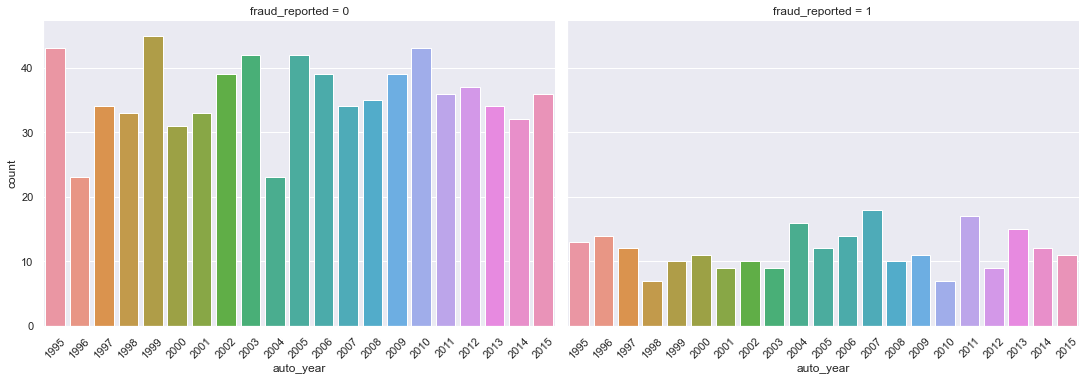

In [34]:
chart = sns.catplot(x="auto_year", col="fraud_reported", data=data_num, kind="count", aspect=1.5)
chart.set_xticklabels(rotation=45)
# plt.savefig('./Daten/VglIncidentVSFraud')
plt.show()

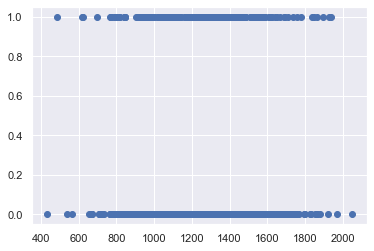

In [35]:
plt.scatter(data_num.policy_annual_premium, data_num.fraud_reported)

plt.show()

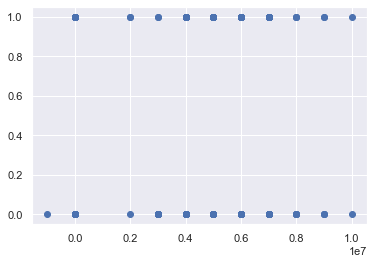

In [36]:
plt.scatter(data_num.umbrella_limit, data_num.fraud_reported)

plt.show()

## 3.3 Feature Engineering
### new feature with percentage of paid share of damage (without deductible)

In [37]:
# Preparation
# data_num.loc[:, 'injury_claim':'vehicle_claim'].apply(sum, axis=1)
data_num['total_claims'] = data_num.loc[:, 'injury_claim':'vehicle_claim'].apply(sum, axis=1)
data_num.head()

<ipython-input-37-587d575ccaa7>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_num['total_claims'] = data_num.loc[:, 'injury_claim':'vehicle_claim'].apply(sum, axis=1)


,months_as_customer,policy_deductable,policy_annual_premium,umbrella_limit,capital-gains,capital-loss,number_of_vehicles_involved,bodily_injuries,witnesses,injury_claim,property_claim,vehicle_claim,auto_year,fraud_reported,total_claims
0,328,1000,1406.91,0,53300,0,1,1,2,6510,13020,52080,2004,1,71610
1,228,2000,1197.22,5000000,0,0,1,0,0,780,780,3510,2007,1,5070
2,134,2000,1413.14,5000000,35100,0,3,2,3,7700,3850,23100,2007,0,34650
3,256,2000,1415.74,6000000,48900,-62400,1,1,2,6340,6340,50720,2014,1,63400
4,228,1000,1583.91,6000000,66000,-46000,1,0,1,1300,650,4550,2009,0,6500


In [38]:
# add new feature
data_num['pct_paid_insurance'] = (data_num.total_claims - data_num.policy_deductable) / data_num.total_claims 

<ipython-input-38-2d01ef42697c>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_num['pct_paid_insurance'] = (data_num.total_claims - data_num.policy_deductable) / data_num.total_claims


In [39]:
data_num.pct_paid_insurance

0      0.986035
1      0.605523
2      0.942280
3      0.968454
4      0.846154
         ...   
995    0.988532
996    0.990782
997    0.992593
998    0.957429
999    0.802372
Name: pct_paid_insurance, Length: 1000, dtype: float64

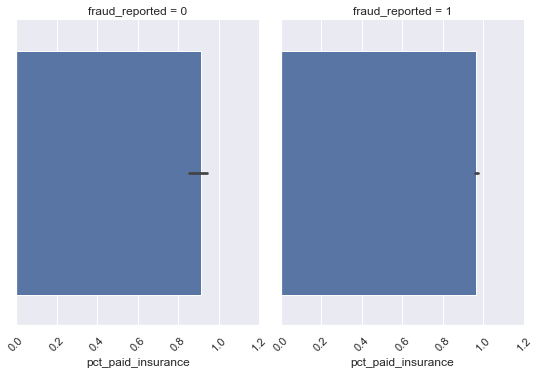

In [40]:
chart = sns.catplot(x="pct_paid_insurance", col="fraud_reported", data=data_num, kind="bar", aspect=0.75)
chart.set_xticklabels(rotation=45)
# plt.savefig('./Daten/VglIncidentVSFraud')
plt.show()

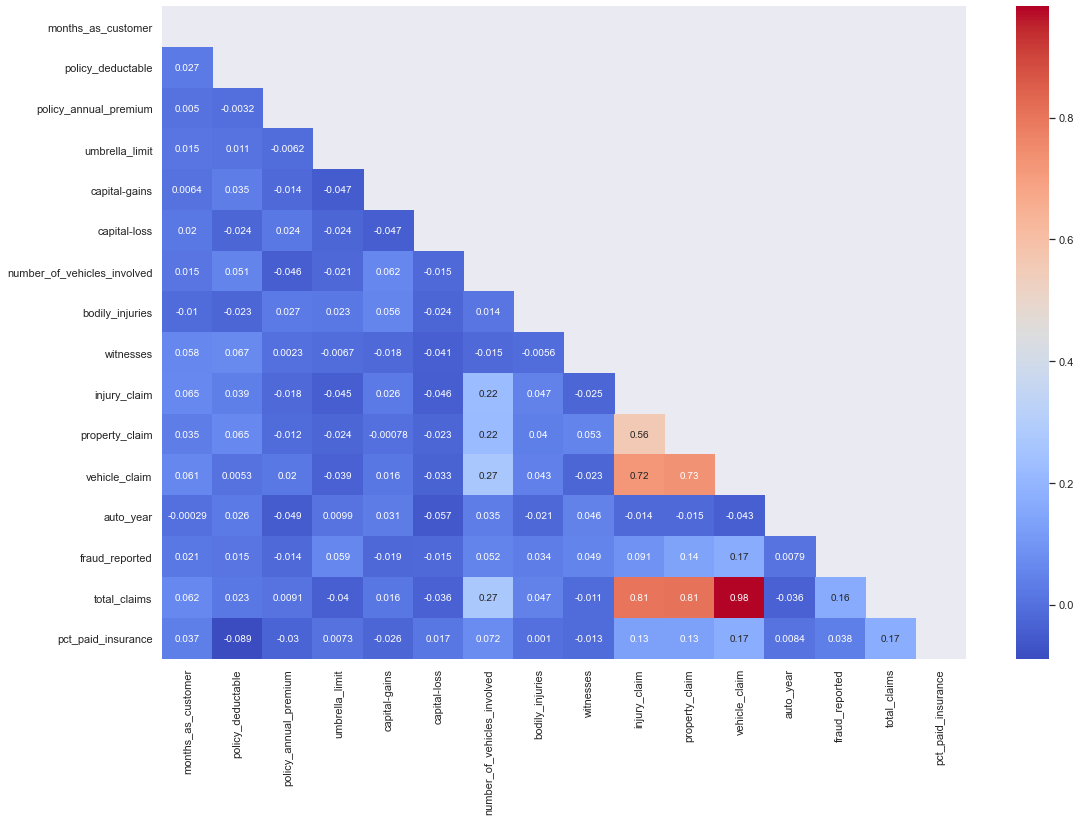

In [41]:
# checking correlation with the new feature
plt.figure(figsize=(18, 12))

feature_corr = data_num.corr()
mask = np.triu(np.ones_like(feature_corr, dtype = bool))
sns.heatmap(feature_corr, mask=mask, annot=True, cmap='coolwarm')

plt.show()

In [42]:
# drop not relevant features
data_num.drop(['auto_year', 'total_claims'], axis=1, inplace=True)

C:\Users\eebal\Anaconda3\lib\site-packages\pandas\core\frame.py:4163: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return super().drop(


In [43]:
data_num.head()

,months_as_customer,policy_deductable,policy_annual_premium,umbrella_limit,capital-gains,capital-loss,number_of_vehicles_involved,bodily_injuries,witnesses,injury_claim,property_claim,vehicle_claim,fraud_reported,pct_paid_insurance
0,328,1000,1406.91,0,53300,0,1,1,2,6510,13020,52080,1,0.986035
1,228,2000,1197.22,5000000,0,0,1,0,0,780,780,3510,1,0.605523
2,134,2000,1413.14,5000000,35100,0,3,2,3,7700,3850,23100,0,0.942280
3,256,2000,1415.74,6000000,48900,-62400,1,1,2,6340,6340,50720,1,0.968454
4,228,1000,1583.91,6000000,66000,-46000,1,0,1,1300,650,4550,0,0.846154


In [44]:
data_cat.describe(include='all')

,policy_csl,insured_sex,insured_education_level,insured_occupation,insured_hobbies,insured_relationship,incident_type,collision_type,incident_severity,authorities_contacted,property_damage,police_report_available,fraud_reported
count,1000,1000,1000,1000,1000,1000,1000,1000,1000,1000,1000,1000,1000.000000
unique,3,2,7,14,20,6,4,3,4,5,2,2,NaN
top,250/500,FEMALE,JD,machine-op-inspct,reading,own-child,Multi-vehicle Collision,Rear Collision,Minor Damage,Police,NO,NO,NaN
freq,351,537,161,93,64,183,419,470,354,292,698,686,NaN
mean,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.247000
std,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.431483
min,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.000000
25%,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.000000
50%,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.000000
75%,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.000000


In [45]:
data_num.describe()

,months_as_customer,policy_deductable,policy_annual_premium,umbrella_limit,capital-gains,capital-loss,number_of_vehicles_involved,bodily_injuries,witnesses,injury_claim,property_claim,vehicle_claim,fraud_reported,pct_paid_insurance
count,1000.000000,1000.000000,1000.000000,1.000000e+03,1000.000000,1000.000000,1000.00000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000
mean,203.954000,1136.000000,1256.406150,1.101000e+06,25126.100000,-26793.700000,1.83900,0.992000,1.487000,7433.420000,7399.570000,37928.950000,0.247000,0.923527
std,115.113174,611.864673,244.167395,2.297407e+06,27872.187708,28104.096686,1.01888,0.820127,1.111335,4880.951853,4824.726179,18886.252893,0.431483,0.639068
min,0.000000,500.000000,433.330000,-1.000000e+06,0.000000,-111100.000000,1.00000,0.000000,0.000000,0.000000,0.000000,70.000000,0.000000,-19.000000
25%,115.750000,500.000000,1089.607500,0.000000e+00,0.000000,-51500.000000,1.00000,0.000000,1.000000,4295.000000,4445.000000,30292.500000,0.000000,0.963948
50%,199.500000,1000.000000,1257.200000,0.000000e+00,0.000000,-23250.000000,1.00000,1.000000,1.000000,6775.000000,6750.000000,42100.000000,0.000000,0.980558
75%,276.250000,2000.000000,1415.695000,0.000000e+00,51025.000000,0.000000,3.00000,2.000000,2.000000,11305.000000,10885.000000,50822.500000,0.000000,0.988895
max,479.000000,2000.000000,2047.590000,1.000000e+07,100500.000000,0.000000,4.00000,2.000000,3.000000,21450.000000,23670.000000,79560.000000,1.000000,0.995548


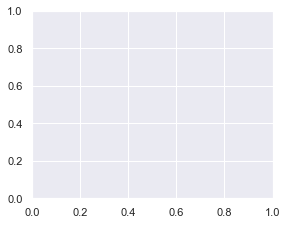

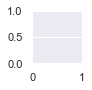

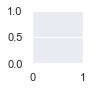

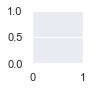

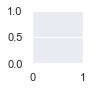

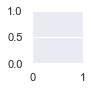

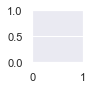

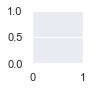

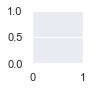

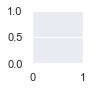

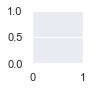

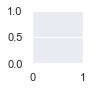

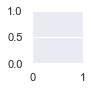

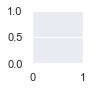

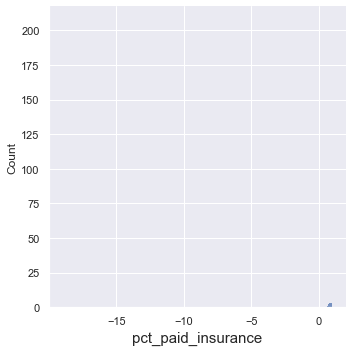

In [46]:
plt.figure(figsize = (25, 20))
plotnumber = 1

for col in data_num.columns:
    if plotnumber <= data_num.shape[1]:
        ax = plt.subplot(5, 5, plotnumber)
        sns.displot(data_num[col])
        plt.xlabel(col, fontsize = 15)
        
    plotnumber += 1
    
plt.tight_layout()
plt.show()

0    753
1    247
Name: fraud_reported, dtype: int64


([<matplotlib.patches.Wedge at 0x13cf911c550>,
 [Text(-0.7704522141128092, -0.7851136132870644, 'No Fraud'),
  Text(0.8054727308753049, 0.8208006334161048, 'Fraud')],
 [Text(-0.4202466622433504, -0.42824378906567145, '75.3'),
  Text(0.45526719571212887, 0.463930792800407, '24.7')])

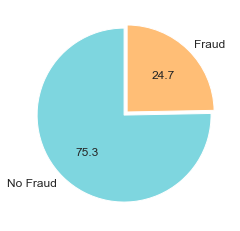

In [47]:
print(data_num.fraud_reported.value_counts())
plt.pie(data_num.fraud_reported.value_counts(), labels=['No Fraud', 'Fraud'], autopct='%.1f', 
        startangle=90, explode=[0, 0.05], colors=['#7ed6df', '#ffbe76'], textprops={'fontsize': 12})

--> Its an unbalanced dataset.

## 3.4 Creating dummy-variables

In [48]:
# create dummy variables
data_cat.drop('fraud_reported', axis=1, inplace=True)
dummies = pd.get_dummies(data_cat, drop_first=True)

In [49]:
dummies.head()

,policy_csl_250/500,policy_csl_500/1000,insured_sex_MALE,insured_education_level_College,insured_education_level_High School,insured_education_level_JD,insured_education_level_MD,insured_education_level_Masters,insured_education_level_PhD,insured_occupation_armed-forces,...,collision_type_Side Collision,incident_severity_Minor Damage,incident_severity_Total Loss,incident_severity_Trivial Damage,authorities_contacted_Fire,authorities_contacted_None,authorities_contacted_Other,authorities_contacted_Police,property_damage_YES,police_report_available_YES
0,1,0,1,0,0,0,1,0,0,0,...,1,0,0,0,0,0,0,1,1,1
1,1,0,1,0,0,0,1,0,0,0,...,0,1,0,0,0,0,0,1,0,0
2,0,0,0,0,0,0,0,0,1,0,...,0,1,0,0,0,0,0,1,0,0
3,1,0,0,0,0,0,0,0,1,1,...,0,0,0,0,0,0,0,1,0,0
4,0,1,1,0,0,0,0,0,0,0,...,0,1,0,0,0,1,0,0,0,0


In [50]:
data_preprocessed = pd.concat([dummies, data_num], axis=1)
data_preprocessed.shape

(1000, 74)

In [51]:
data_preprocessed.head()

,policy_csl_250/500,policy_csl_500/1000,insured_sex_MALE,insured_education_level_College,insured_education_level_High School,insured_education_level_JD,insured_education_level_MD,insured_education_level_Masters,insured_education_level_PhD,insured_occupation_armed-forces,...,capital-gains,capital-loss,number_of_vehicles_involved,bodily_injuries,witnesses,injury_claim,property_claim,vehicle_claim,fraud_reported,pct_paid_insurance
0,1,0,1,0,0,0,1,0,0,0,...,53300,0,1,1,2,6510,13020,52080,1,0.986035
1,1,0,1,0,0,0,1,0,0,0,...,0,0,1,0,0,780,780,3510,1,0.605523
2,0,0,0,0,0,0,0,0,1,0,...,35100,0,3,2,3,7700,3850,23100,0,0.942280
3,1,0,0,0,0,0,0,0,1,1,...,48900,-62400,1,1,2,6340,6340,50720,1,0.968454
4,0,1,1,0,0,0,0,0,0,0,...,66000,-46000,1,0,1,1300,650,4550,0,0.846154


In [52]:
data_preprocessed.to_csv('dataset_dummies', index=False)